In [2]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv("players_20.csv")

In [4]:
df.shape

(18278, 69)

In [5]:
df.head()


,sofifa_id,short_name,long_name,age,height_cm,weight_kg,nationality,club,overall,potential,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,170,72,Argentina,FC Barcelona,94,94,...,75,96,33,37,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,187,83,Portugal,Juventus,93,93,...,85,95,28,32,24,7,11,15,14,11
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,175,68,Brazil,Paris Saint-Germain,92,92,...,90,94,27,26,29,9,9,15,15,11
3,200389,J. Oblak,Jan Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,...,11,68,27,12,18,87,92,78,90,89
4,183277,E. Hazard,Eden Hazard,28,175,74,Belgium,Real Madrid,91,91,...,88,91,34,27,22,11,12,6,8,8


In [6]:
df.info

<bound method DataFrame.info of        sofifa_id         short_name                            long_name  age  \
0         158023           L. Messi       Lionel Andrés Messi Cuccittini   32   
1          20801  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2         190871          Neymar Jr        Neymar da Silva Santos Junior   27   
3         200389           J. Oblak                            Jan Oblak   26   
4         183277          E. Hazard                          Eden Hazard   28   
...          ...                ...                                  ...  ...   
18273     245006         Shao Shuai                                   邵帅   22   
18274     250995       Xiao Mingjie                         Mingjie Xiao   22   
18275     252332          Zhang Wei                                   张威   19   
18276     251110       Wang Haijian                                  汪海健   18   
18277     233449         Pan Ximing                                  潘喜明   26

In [7]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [8]:
df.isnull().sum()

sofifa_id                  0
short_name                 0
long_name                  0
age                        0
height_cm                  0
                          ..
goalkeeping_diving         0
goalkeeping_handling       0
goalkeeping_kicking        0
goalkeeping_positioning    0
goalkeeping_reflexes       0
Length: 69, dtype: int64

In [9]:
duplicateDFRow = df[df.duplicated()] # check
print(duplicateDFRow)
df = df.drop_duplicates()

Empty DataFrame
Columns: [sofifa_id, short_name, long_name, age, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, team_position, team_jersey_number, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defe

In [10]:
df.shape

(18278, 69)

In [11]:
df.drop(columns=["long_name","short_name","team_position","nation_position","team_jersey_number","nation_jersey_number","player_traits","gk_diving","gk_handling","gk_kicking","gk_reflexes",'gk_speed','gk_positioning','potential','value_eur'], inplace=True)

In [12]:
df['average_skill']=df[['skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control']].mean(axis=1)
print(df['average_skill'])

0        94.4
1        83.0
2        89.4
3        21.8
4        86.8
         ... 
18273    26.2
18274    31.0
18275    41.6
18276    43.0
18277    41.4
Name: average_skill, Length: 18278, dtype: float64


In [13]:
df['average_attacking']=df[['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys']].mean(axis=1)
print(df['average_attacking'])

0        86.6
1        87.4
2        82.0
3        19.0
4        79.6
         ... 
18273    28.0
18274    31.4
18275    39.8
18276    40.4
18277    41.0
Name: average_attacking, Length: 18278, dtype: float64


In [14]:
df['average_movement']=df[['movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance']].mean(axis=1)
print(df['average_movement'])

0        91.6
1        86.8
2        91.0
3        61.4
4        92.2
         ... 
18273    54.4
18274    55.2
18275    54.0
18276    57.2
18277    58.0
Name: average_movement, Length: 18278, dtype: float64


In [15]:
df['average_power']=df[['power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots']].mean(axis=1)
print(df['average_power'])

0        78.2
1        89.2
2        71.0
3        53.6
4        73.0
         ... 
18273    45.8
18274    44.8
18275    47.0
18276    46.4
18277    47.2
Name: average_power, Length: 18278, dtype: float64


In [16]:
df['average_mentality']=df[['mentality_aggression','mentality_positioning','mentality_penalties','mentality_composure','mentality_interceptions', 'mentality_vision']].mean(axis=1)
print(df['average_mentality'])

0        74.500000
1        74.833333
2        74.666667
3        34.666667
4        75.000000
           ...    
18273    37.833333
18274    35.166667
18275    41.000000
18276    43.500000
18277    43.666667
Name: average_mentality, Length: 18278, dtype: float64


In [17]:
df['average_defending']=df[['defending_marking','defending_standing_tackle','defending_sliding_tackle']].mean(axis=1)
print(df['average_defending'])

0        32.000000
1        28.000000
2        27.333333
3        19.000000
4        27.666667
           ...    
18273    49.000000
18274    50.666667
18275    48.000000
18276    45.666667
18277    47.333333
Name: average_defending, Length: 18278, dtype: float64


In [18]:
df['average_goalkeeping']=df[['goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']].mean(axis=1)
print(df['average_goalkeeping'])

0        10.8
1        11.6
2        11.8
3        87.2
4         9.0
         ... 
18273     8.4
18274    10.6
18275     9.0
18276    12.4
18277    10.6
Name: average_goalkeeping, Length: 18278, dtype: float64


In [19]:
df.drop(columns=['movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_positioning','mentality_penalties','mentality_composure','mentality_interceptions', 'mentality_vision','defending_marking','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control'],inplace=True)

In [20]:
df.shape

(18278, 27)

In [21]:
df.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'average_skill', 'average_attacking', 'average_movement',
       'average_power', 'average_mentality', 'average_defending',
       'average_goalkeeping'],
      dtype='object')

# LABEL ENCODING


In [22]:
df.dtypes

sofifa_id                     int64
age                           int64
height_cm                     int64
weight_kg                     int64
nationality                  object
club                         object
overall                       int64
wage_eur                      int64
player_positions             object
preferred_foot               object
international_reputation      int64
weak_foot                     int64
skill_moves                   int64
work_rate                    object
pace                        float64
shooting                    float64
passing                     float64
dribbling                   float64
defending                   float64
physic                      float64
average_skill               float64
average_attacking           float64
average_movement            float64
average_power               float64
average_mentality           float64
average_defending           float64
average_goalkeeping         float64
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
columns=['club','nationality','player_positions','preferred_foot','work_rate']
le=LabelEncoder()
for col in columns:
    df[col] = le.fit_transform(df[col])

print(df)

       sofifa_id  age  height_cm  weight_kg  nationality  club  overall  \
0         158023   32        170         72            5   224       94   
1          20801   34        187         83          121   350       93   
2         190871   27        175         68           18   462       92   
3         200389   26        188         87          133    63       91   
4         183277   28        175         74           12   505       91   
...          ...  ...        ...        ...          ...   ...      ...   
18273     245006   22        186         79           28    79       48   
18274     250995   22        177         66           28   574       48   
18275     252332   19        186         75           28   317       48   
18276     251110   18        185         74           28   573       48   
18277     233449   26        182         78           28   317       48   

       wage_eur  player_positions  preferred_foot  ...  dribbling  defending  \
0        565000    

In [24]:
columns_to_fill = ['pace', 'shooting', 'dribbling', 'defending', 'physic', 'passing']
df.fillna(df[columns_to_fill].mean(), inplace=True)

In [25]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index([], dtype='object')


In [26]:
nan_values = df.isna().sum()
nan_values

sofifa_id                   0
age                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
wage_eur                    0
player_positions            0
preferred_foot              0
international_reputation    0
weak_foot                   0
skill_moves                 0
work_rate                   0
pace                        0
shooting                    0
passing                     0
dribbling                   0
defending                   0
physic                      0
average_skill               0
average_attacking           0
average_movement            0
average_power               0
average_mentality           0
average_defending           0
average_goalkeeping         0
dtype: int64

# EDA

In [27]:
X = df.drop(['overall'],axis=1)
y = df['overall']
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,sofifa_id,age,height_cm,weight_kg,nationality,club,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,average_skill,average_attacking,average_movement,average_power,average_mentality,average_defending,average_goalkeeping
sofifa_id,1.000000,-0.736680,-0.093464,-0.203620,-0.004378,-0.031298,-0.228084,0.012803,-0.007349,-0.360765,-0.092250,-0.079645,0.088672,0.145834,-0.246711,-0.330623,-0.199895,-0.202614,-0.333371,-0.156383,-0.155565,-0.006552,-0.280343,-0.263559,-0.097212,-0.117500
age,-0.736680,1.000000,0.081391,0.237169,-0.032600,-0.010306,0.151031,-0.031916,0.006451,0.259582,0.073988,0.045277,-0.093286,-0.185087,0.219839,0.304022,0.148939,0.239156,0.400410,0.132553,0.147495,-0.032349,0.294866,0.264678,0.127282,0.115175
height_cm,-0.093464,0.081391,1.000000,0.768816,0.009265,0.027296,0.019547,-0.131949,0.083072,0.037935,-0.175200,-0.429980,0.185027,-0.389155,-0.183445,-0.261704,-0.372236,0.194886,0.441560,-0.466655,-0.374373,-0.640911,-0.161485,-0.309677,-0.075668,0.371351
weight_kg,-0.203620,0.237169,0.768816,1.000000,-0.025457,0.017202,0.065946,-0.084519,0.077787,0.090854,-0.128568,-0.352060,0.129082,-0.346520,-0.085428,-0.163521,-0.269234,0.195633,0.520913,-0.369559,-0.284572,-0.538106,-0.031109,-0.208247,-0.056978,0.346813
nationality,-0.004378,-0.032600,0.009265,-0.025457,1.000000,0.019029,-0.026189,0.012750,0.006661,-0.011211,-0.004345,-0.017926,-0.001357,-0.017911,0.002845,0.012944,0.004078,0.000177,-0.039244,-0.001158,-0.012254,-0.021579,-0.032474,-0.011839,-0.007597,0.015052
club,-0.031298,-0.010306,0.027296,0.017202,0.019029,1.000000,-0.003923,0.006828,0.000989,0.007116,0.011183,0.006640,-0.016037,-0.001108,0.008670,0.013980,0.012707,0.007396,0.012635,0.007207,0.006517,0.002175,0.012634,0.012254,0.004230,0.000409
wage_eur,-0.228084,0.151031,0.019547,0.065946,-0.026189,-0.003923,1.000000,0.007940,-0.013084,0.652061,0.149405,0.263147,-0.140985,0.109426,0.290814,0.389212,0.357571,0.159616,0.215062,0.283427,0.281559,0.210980,0.304819,0.330674,0.137244,-0.024007
player_positions,0.012803,-0.031916,-0.131949,-0.084519,0.012750,0.006828,0.007940,1.000000,0.060146,0.004966,0.104461,0.208972,-0.182683,0.382146,0.444567,-0.011921,0.297605,-0.589162,-0.145709,0.120670,0.243933,0.276513,0.167764,0.029817,-0.461538,-0.068124
preferred_foot,-0.007349,0.006451,0.083072,0.077787,0.006661,0.000989,-0.013084,0.060146,1.000000,0.004946,0.075437,-0.105700,0.039561,-0.064170,0.021275,-0.083707,-0.063259,-0.047998,0.050589,-0.140340,-0.099793,-0.115381,-0.040424,-0.092753,-0.108856,0.103058
international_reputation,-0.360765,0.259582,0.037935,0.090854,-0.011211,0.007116,0.652061,0.004966,0.004946,1.000000,0.127792,0.199696,-0.098281,0.004099,0.260377,0.337026,0.281410,0.131510,0.167724,0.229094,0.229804,0.118518,0.240073,0.280955,0.095772,0.006285


[0.04037008 0.04008484 0.03820356 0.03849468 0.03941454 0.03962859
 0.04936441 0.03061843 0.01842661 0.00678456 0.02671776 0.01322473
 0.02480552 0.0339392  0.04118784 0.04154675 0.04765339 0.0552098
 0.03861464 0.04370291 0.0488353  0.04187612 0.04513323 0.04925221
 0.05609962 0.05081068]


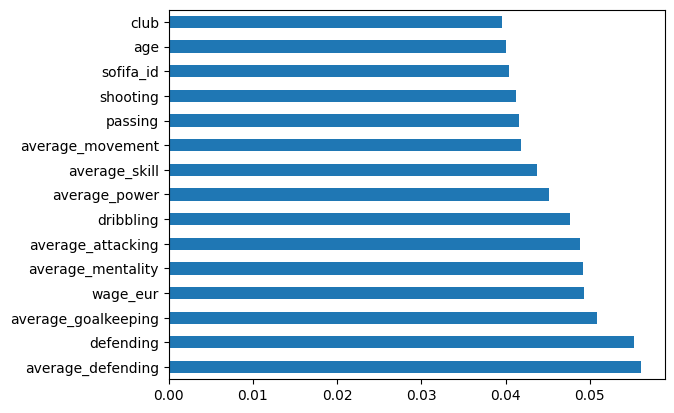

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = X.fillna(0)
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)


feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [29]:
X.shape

(18278, 26)

# Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

print(df.columns)

numerical_features = ['age', 'height_cm', 'weight_kg', 'overall', 'international_reputation', 'weak_foot', 'skill_moves', 'wage_eur']

numerical_df = df[numerical_features]

scaler = StandardScaler()

scaler.fit(numerical_df)

scaled_numerical_df = scaler.transform(numerical_df)

df[numerical_features] = scaled_numerical_df

print(df.head())

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'average_skill', 'average_attacking', 'average_movement',
       'average_power', 'average_mentality', 'average_defending',
       'average_goalkeeping'],
      dtype='object')
   sofifa_id       age  height_cm  weight_kg  nationality  club   overall  \
0     158023  1.442333  -1.681598  -0.464891            5   224  3.993662   
1      20801  1.871809   0.834394   1.095935          121   350  3.849772   
2     190871  0.368643  -0.941600  -1.032464           18   462  3.705883   
3     200389  0.153905   0.982394   1.663508          133    63  3.561993   
4     183277  0.583381  -0.941600  -0.181104           12   505  3.561993   

    wage_eur  player_positions  preferred_foot  ...  dribbl

In [31]:
df.head()

,sofifa_id,age,height_cm,weight_kg,nationality,club,overall,wage_eur,player_positions,preferred_foot,...,dribbling,defending,physic,average_skill,average_attacking,average_movement,average_power,average_mentality,average_defending,average_goalkeeping
0,158023,1.442333,-1.681598,-0.464891,5,224,3.993662,26.019375,544,0,...,96.000000,39.000000,66.000000,94.4,86.6,91.6,78.2,74.500000,32.000000,10.8
1,20801,1.871809,0.834394,1.095935,121,350,3.849772,18.525626,620,1,...,89.000000,35.000000,78.000000,83.0,87.4,86.8,89.2,74.833333,28.000000,11.6
2,190871,0.368643,-0.941600,-1.032464,18,462,3.705883,13.139495,344,1,...,95.000000,32.000000,58.000000,89.4,82.0,91.0,71.0,74.666667,27.333333,11.8
3,200389,0.153905,0.982394,1.663508,133,63,3.561993,5.411566,226,1,...,62.531585,51.553503,64.876678,21.8,19.0,61.4,53.6,34.666667,19.000000,87.2
4,183277,0.583381,-0.941600,-0.181104,12,505,3.561993,21.569962,350,1,...,94.000000,35.000000,66.000000,86.8,79.6,92.2,73.0,75.000000,27.666667,9.0


# Model Split Train

In [32]:
X = df.drop(['overall'],axis=1)
y = df['overall']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EVALUATE MODEL

In [33]:
from sklearn.linear_model import LinearRegression

test_sizes = [0.2, 0.6, 0.7, 0.8, 0.9]

for test_size in test_sizes:
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    start_time = time.time()

    pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
    pipeline.fit(np.array(X_train), Y_train)
    y_pred = pipeline.predict(X_test)

    
    accuracy_score = pipeline.score(X_train, Y_train)
    print('Model Accuracy (R-squared):', accuracy_score)

    
    mse = mean_squared_error(Y_test, y_pred)
    print('Mean Squared Error (MSE):', mse)

    
    rmse = np.sqrt(mse)
    print('Root Mean Squared Error (RMSE):', rmse)

    
    mae = mean_absolute_error(Y_test, y_pred)
    print('Mean Absolute Error (MAE):', mae)

    
    r2 = r2_score(Y_test, y_pred)
    print('R-squared (R2):', r2)

    
    mpe = np.mean((Y_test - y_pred) / Y_test) * 100
    print('Mean Percentage Error (MPE):', mpe)

    
    mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
    print('Mean Absolute Percentage Error (MAPE):', mape)

    end_time = time.time()

    
    execution_time = end_time - start_time
    print('Execution Time:', execution_time, 'seconds')
    print('-------------------------')

c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


Model Accuracy (R-squared): 0.964931076485462
Mean Squared Error (MSE): 0.03716041800128167
Root Mean Squared Error (RMSE): 0.19277037635819896
Mean Absolute Error (MAE): 0.15024731305611885
R-squared (R2): 0.9620133084467453
Mean Percentage Error (MPE): 8.260313566940471
Mean Absolute Percentage Error (MAPE): 58.37657407937904
Execution Time: 1.256150245666504 seconds
-------------------------


c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


Model Accuracy (R-squared): 0.9665737352647645
Mean Squared Error (MSE): 0.03970698676702879
Root Mean Squared Error (RMSE): 0.19926612046965933
Mean Absolute Error (MAE): 0.15457358865154022
R-squared (R2): 0.9600304904957357
Mean Percentage Error (MPE): 5.473267689895889
Mean Absolute Percentage Error (MAPE): 59.84564453994565
Execution Time: 0.6026649475097656 seconds
-------------------------


c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


Model Accuracy (R-squared): 0.9668860044013272
Mean Squared Error (MSE): 0.04111696811660501
Root Mean Squared Error (RMSE): 0.2027731937821294
Mean Absolute Error (MAE): 0.1557270073003908
R-squared (R2): 0.9587870901003279
Mean Percentage Error (MPE): 4.593784790418814
Mean Absolute Percentage Error (MAPE): 60.441709107030746
Execution Time: 0.4885237216949463 seconds
-------------------------


c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


Model Accuracy (R-squared): 0.9680187434473357
Mean Squared Error (MSE): 0.042937345365797096
Root Mean Squared Error (RMSE): 0.2072132847232462
Mean Absolute Error (MAE): 0.1588660055208617
R-squared (R2): 0.9570381375142826
Mean Percentage Error (MPE): 5.154264528215409
Mean Absolute Percentage Error (MAPE): 60.16578116645326
Execution Time: 0.4041318893432617 seconds
-------------------------
Model Accuracy (R-squared): 0.9719402554880355
Mean Squared Error (MSE): 0.05091189372933736
Root Mean Squared Error (RMSE): 0.2256366409281466
Mean Absolute Error (MAE): 0.16989970717978836
R-squared (R2): 0.9490810514957213
Mean Percentage Error (MPE): 4.853264585772693
Mean Absolute Percentage Error (MAPE): 62.73425947370027
Execution Time: 0.34819674491882324 seconds
-------------------------


c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


# Linear Regression


In [34]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,Y_train)
y_pred = linear.predict(X_test)
linear.score(X_test,Y_test)
print(linear.intercept_)
print(linear.coef_)

-6.633997502461798
[ 1.72563976e-06  8.72553019e-02  4.76851555e-02  8.00691598e-02
  1.94797786e-04  3.72727449e-05  2.69815655e-01 -3.60718660e-04
 -1.40118990e-02 -6.45205468e-03  1.16195941e-02  1.22732602e-01
 -6.34268112e-03 -8.46579003e-03 -2.77916759e-02 -1.48889835e-02
  2.35833262e-02  2.43306088e-02  2.59283805e-03 -4.55802004e-03
  5.91192105e-02  1.94019734e-02  1.94410013e-02  2.18547905e-02
 -1.67882440e-02  5.46358740e-02]


# Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import time

start_time = time.time()

pipeline = make_pipeline(RandomForestRegressor())
pipeline.fit(X_train, Y_train)
y_pred = pipeline.predict(X_test)
accuracy_score = pipeline.score(X_train, Y_train)
print('Model Accuracy:', accuracy_score)


end_time = time.time()

execution_time = end_time - start_time
print('Execution Time:', execution_time, 'seconds')

Model Accuracy: 0.9922613684086453
Execution Time: 1.8959927558898926 seconds


# Random Forest Parallel Computing

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import time

start_time = time.time()

rf_regressor = RandomForestRegressor(n_jobs=-1)


pipeline = make_pipeline(rf_regressor)

pipeline.fit(X_train, Y_train)

y_pred = pipeline.predict(X_test)

accuracy_score = pipeline.score(X_train, Y_train)
print('Model Accuracy (R-squared):', accuracy_score)

mse = mean_squared_error(Y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

mae = mean_absolute_error(Y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

r2 = r2_score(Y_test, y_pred)
print('R-squared (R2):', r2)

mpe = np.mean((Y_test - y_pred) / Y_test) * 100
print('Mean Percentage Error (MPE):', mpe)

mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

end_time = time.time()

execution_time = end_time - start_time
print('Execution Time:', execution_time, 'seconds')

Model Accuracy (R-squared): 0.9917155901073476
Mean Squared Error (MSE): 0.05437434336991566
Root Mean Squared Error (RMSE): 0.23318306836028138
Mean Absolute Error (MAE): 0.1778600680996549
R-squared (R2): 0.9456181220693568
Mean Percentage Error (MPE): 7.253592627249252
Mean Absolute Percentage Error (MAPE): 60.86498340268081
Execution Time: 0.4981269836425781 seconds


# SVR

In [37]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time

start_time = time.time()


pipeline = make_pipeline(SVR())
pipeline.fit(X_train, Y_train)
y_pred = pipeline.predict(X_test)

accuracy_score = pipeline.score(X_train, Y_train)
print('Model Accuracy (R-squared):', accuracy_score)

mse = mean_squared_error(Y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

mae = mean_absolute_error(Y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

r2 = r2_score(Y_test, y_pred)
print('R-squared (R2):', r2)

mpe = np.mean((Y_test - y_pred) / Y_test) * 100
print('Mean Percentage Error (MPE):', mpe)

mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

end_time = time.time()

execution_time = end_time - start_time
print('Execution Time:', execution_time, 'seconds')


Model Accuracy (R-squared): 0.2696835634587874
Mean Squared Error (MSE): 0.7253873603754353
Root Mean Squared Error (RMSE): 0.8516967537659371
Mean Absolute Error (MAE): 0.6737264332702438
R-squared (R2): 0.27451212392581703
Mean Percentage Error (MPE): 79.9349076288579
Mean Absolute Percentage Error (MAPE): 162.73675983448405
Execution Time: 3.620722770690918 seconds


# Pipeline

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
import time


start_time = time.time()

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(np.array(X_train), Y_train)
y_pred = pipeline.predict(X_test)

accuracy_score = pipeline.score(X_train, Y_train)
print('Model Accuracy (R-squared):', accuracy_score)

mse = mean_squared_error(Y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

mae = mean_absolute_error(Y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

r2 = r2_score(Y_test, y_pred)
print('R-squared (R2):', r2)

mpe = np.mean((Y_test - y_pred) / Y_test) * 100

mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

end_time = time.time()

#execution time
execution_time = end_time - start_time
print('Execution Time:', execution_time, 'seconds')

Model Accuracy (R-squared): 0.9719402554880355
Mean Squared Error (MSE): 0.05091189372933736
Root Mean Squared Error (RMSE): 0.2256366409281466
Mean Absolute Error (MAE): 0.16989970717978836
R-squared (R2): 0.9490810514957213
Mean Absolute Percentage Error (MAPE): 62.73425947370027
Execution Time: 0.3543703556060791 seconds


c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

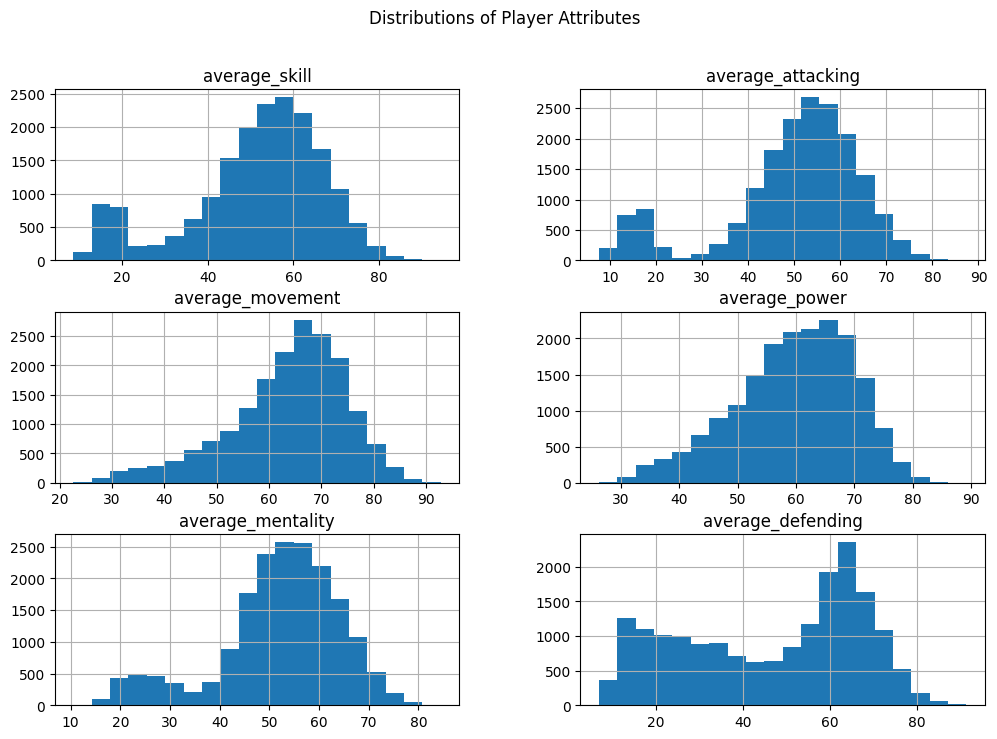

In [39]:
# Histogram for attribute distributions
plt.figure(figsize=(10, 6))
df[['average_skill', 'average_attacking', 'average_movement', 'average_power', 'average_mentality', 'average_defending']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distributions of Player Attributes')
plt.show()


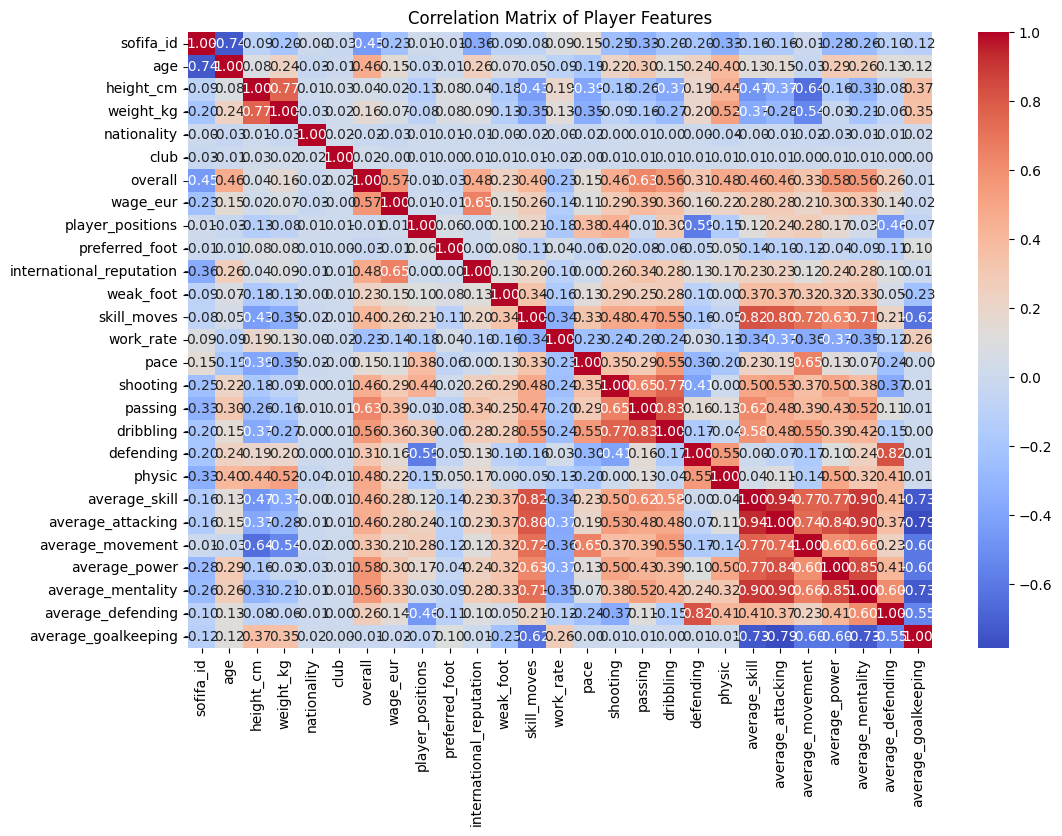

In [40]:
# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Player Features')
plt.show()


c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
C:\Users\Kanishk Singhania\AppData\Local\Temp\ipykernel_11612\2937124811.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='red')


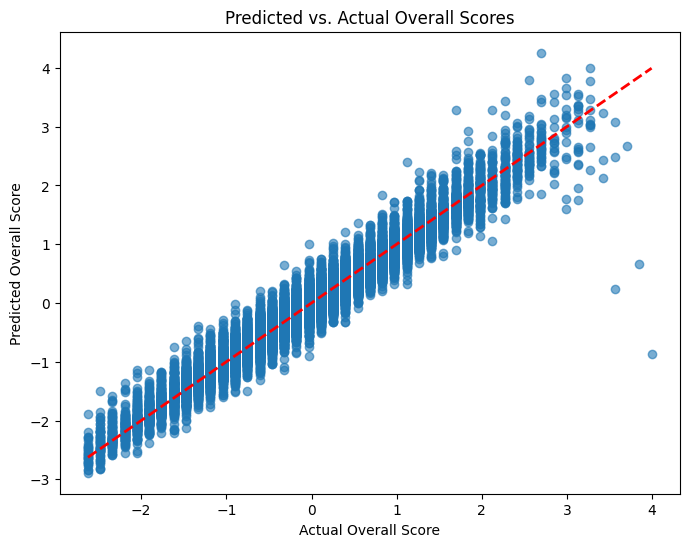

In [41]:
# Scatter plot for predicted vs actual
y_pred = pipeline.predict(X_test)  # Assuming pipeline is trained on your data
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Overall Score')
plt.ylabel('Predicted Overall Score')
plt.title('Predicted vs. Actual Overall Scores')
plt.show()
